# Jupyter Notebook Activity: Running CASCADE

In this activity, you will learn how to run `CASCADE`. You will also learn how to update variables outside of CASCADE's framework (e.g. in this notebook).

In [1]:
# These are the various libraries we will need

import matplotlib.pyplot as plt
import numpy as np

# Because CASCADE is a Class in Python, we can import it with all its functions
from cascade import Cascade

### Running CASCADE: natural dynamics

In order to run CASCADE with natural dynamics, all additional modules are turned off (set to False) in the initialization. Additionally, in the initialization below, we only show some of the input parameters you can change. There are many others related to various coastal processes and human dynamics. 

In [2]:
datadir = "data/"
name = "natural_dynamics"
total_time = 101

cascade_natural = Cascade(
    datadir,
    name=name,
    elevation_file="barrier3d-default-elevation.npy",
    dune_file="barrier3d-default-dunes.npy",
    parameter_file="barrier3d-default-parameters.yaml",
    storm_file="cascade-default-storms.npy",
    roadway_management_module=False,
    alongshore_transport_module=False,
    beach_nourishment_module=False,
    community_economics_module=False,
    time_step_count=total_time,
    wave_height=1, # ---------- for BRIE and Barrier3D --------------- #
    wave_period=7,
    wave_asymmetry=0.8,
    wave_angle_high_fraction=0.2,
    bay_depth=3.0,
    s_background=0.001,
    berm_elevation=1.9,
    MHW=0.46,
    beta=0.04,
    sea_level_rise_rate=0.004,
    sea_level_rise_constant=True,
    background_erosion=0.0,
    min_dune_growth_rate=0.25,
    max_dune_growth_rate=0.65,
)


In [3]:
# we run CASCADE by looping over its update function

for time_step in range(cascade_natural._nt - 1):
    print("\r", "Time Step: ", time_step + 1, end="")
    cascade_natural.update()
    if cascade_natural.b3d_break:  # here, we check to see if the barrier has drowned and stop if it has
        break

 Time Step:  11

/opt/tljh/user/envs/csdms/lib/python3.11/site-packages/barrier3d/barrier3d.py:1533: RuntimeWarning: invalid value encountered in scalar divide
  Qs1 = Qs0 * Q1 / (Q1 + Q2 + Q3)
/opt/tljh/user/envs/csdms/lib/python3.11/site-packages/barrier3d/barrier3d.py:1534: RuntimeWarning: invalid value encountered in scalar divide
  Qs2 = Qs0 * Q2 / (Q1 + Q2 + Q3)
/opt/tljh/user/envs/csdms/lib/python3.11/site-packages/barrier3d/barrier3d.py:1535: RuntimeWarning: invalid value encountered in scalar divide
  Qs3 = Qs0 * Q3 / (Q1 + Q2 + Q3)


 Time Step:  100

After intializing cascade, you can access variables (which are mostly housed in Barrier3D) using the notation `cascade.barrier3d[0].variable_name` See the example below, where we plot the domain at various time steps from the model run.

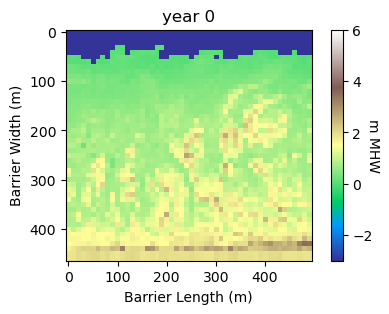

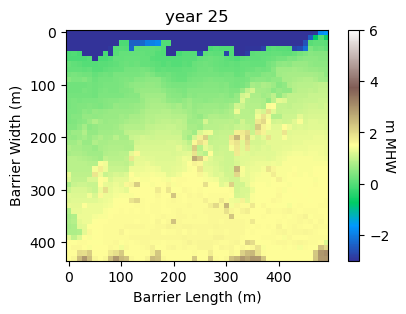

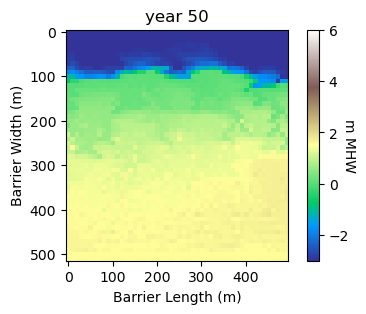

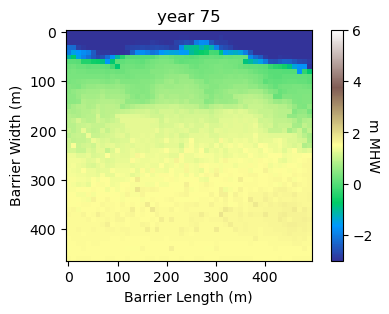

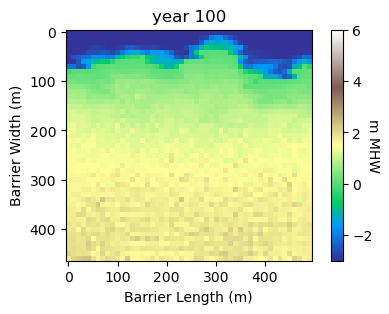

In [4]:
# plotting results (elevations here) from the natural run

plot_years = [0, 25, 50, 75, 100]
vmin = -3
vmax = 6
plot_num = 1

for year in plot_years:
    dune_domain = np.transpose(cascade_natural.barrier3d[0]._DuneDomain[year]) + cascade_natural.barrier3d[0].BermEl
    interior_domain = cascade_natural.barrier3d[0]._DomainTS[year]
    full_domain = np.vstack([dune_domain, interior_domain])
    
    fig1 = plt.figure(figsize=(5,3))
    ax1 = fig1.add_subplot()
    mat = ax1.matshow(
        np.flip(full_domain) * 10,
        cmap="terrain",
        vmin=vmin,
        vmax=vmax,
    )
    ax1.set_title("year {0}".format(year))
    plt.gca().xaxis.tick_bottom()
    xtick_max = np.shape(full_domain)[1]  # n_cols = x
    x_ticks = np.array(range(0, xtick_max, 10))
    x_tick_labels = x_ticks * 10
    ytick_max = np.shape(full_domain)[0]  # n_rows = y
    y_ticks = np.array(range(0, ytick_max, 10))
    y_tick_labels = y_ticks * 10
    plt.xticks(x_ticks, x_tick_labels)
    plt.yticks(y_ticks, y_tick_labels)
    plt.ylabel("Barrier Width (m)")
    plt.xlabel("Barrier Length (m)")
    cbar = fig1.colorbar(mat)
    cbar.set_label('m MHW', rotation=270, labelpad=5)
    plot_num += 1

Text(0, 0.5, 'Overwash Flux [$m^3/m$]')

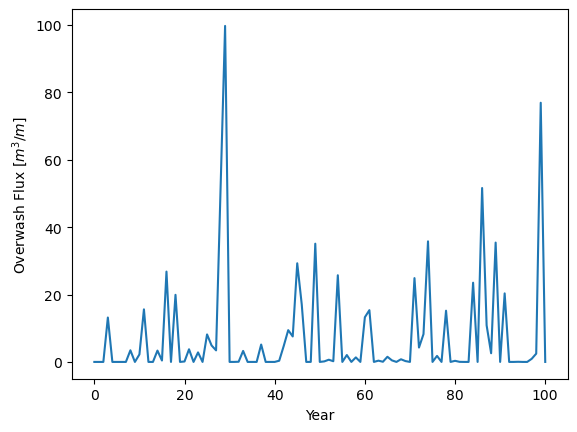

In [5]:
# plotting the overwash flux 

plt.figsize=(5,3)
OWTS = cascade_natural.barrier3d[0].QowTS #m3/m
plt.plot(OWTS)
plt.xlabel("Year")
plt.ylabel("Overwash Flux ($m^3/m$)")

In [ ]:
# plotting the shoreline position 

plt.figsize=(5,3)
natural_xsTS = np.subtract(cascade_natural.barrier3d[0].x_s_TS, cascade_natural.barrier3d[0].x_s_TS[0])  # starts the shoreline position at 0 for plotting by subtracting the initial shoreline posiiton from every value
natural_xsTS_meters = np.multiply(natural_xsTS, 10)  # convering from decameters to meters
plt.plot(natural_xsTS_meters)
plt.xlabel("Year")
plt.ylabel("Shoreline Position (m)")

<div class="alert alert-block alert-info"> In the natural scenario, the barrier interior increases in elevation and widens due to overwash. 
    Overwash also keeps the dunes in a low elevation state. </div>

### Running CASCADE: adding a sand fence

In [12]:
datadir = "data/"
name = "natural_sand_fence"
total_time = 101

cascade_natural_sandfence = Cascade(
    datadir,
    name=name,
    elevation_file="barrier3d-default-elevation.npy",
    dune_file="barrier3d-default-dunes.npy",
    parameter_file="barrier3d-default-parameters.yaml",
    storm_file="cascade-default-storms.npy",
    roadway_management_module=False,
    alongshore_transport_module=False,
    beach_nourishment_module=False,
    community_economics_module=False,
    time_step_count=total_time,
    wave_height=1, # ---------- for BRIE and Barrier3D --------------- #
    wave_period=7,
    wave_asymmetry=0.8,
    wave_angle_high_fraction=0.2,
    bay_depth=3.0,
    s_background=0.001,
    berm_elevation=1.9,
    MHW=0.46,
    beta=0.04,
    sea_level_rise_rate=0.004,
    sea_level_rise_constant=True,
    background_erosion=0.0,
    min_dune_growth_rate=0.25,
    max_dune_growth_rate=0.65,
)

Now that you have a better understanding of how CASCADE works, we want you to add code to simulate the effect of sand fences on dunes. The dunes are each 50 cells long and there are 2 rows of them. Here is a list of variables you may be interested in accessing/changing within CASCADE:
<ul>
 <li> dune domain (array with shape [time_step, 50, 2]) = cascade_natural_sandfence.barrier3d[0].DuneDomain </li>
 <li> maximum dune height (float) = cascade_natural_sandfence.barrier3d[0]._Dmax </li>
 <li> dune growth rate at each cell (array with shape [1, 50]) =  cascade_natural_sandfence.barrier3d[0].growthparam </li>
 <li> minimum dune growth rate (float) =  cascade_natural_sandfence.barrier3d[0].rmin </li>
 <li> maximum dune growth rate (float) =  cascade_natural_sandfence.barrier3d[0].rmax </li>
 <li> you may also want to make your own variables to keep track of the sand fence, etc. </li>
 </ul>

<b>In our example, sand fences decrease the maximum elevation of the first line of dunes while increasing their growth rate. The sand fence is added when the dune cell becomes less than 1 meter in height. 

In [13]:
for time_step in range(cascade_natural_sandfence._nt - 1):
    print("\r", "Time Step: ", time_step + 1, end="")
    cascade_natural_sandfence.update()    
    
    ### INSERT CODE HERE ###
    
    dunes = cascade_natural_sandfence.barrier3d[0].DuneDomain[time_step]  # 50 rows (length) by 2 columns (width)
    ny = np.size(dunes, 0)  # length of dunes (50)
    sand_fence_array = np.zeros(ny)
    new_Dmax = cascade_natural_sandfence.barrier3d[0]._Dmax - 0.002
    
    # if dunes are less than a meter tall, create a sand fence. They increase the growth rate, but decrease the Dmax
    for dune_cell in range(ny):
        if dunes[dune_cell, 0] < 0.01:  
            sand_fence_array[dune_cell] = 1  # keep track of where the sand fence has been installed along the dunes 
            cascade_natural_sandfence.barrier3d[0].growthparam[0, dune_cell] += 0.05
            
        if sand_fence_array[dune_cell] == 1:
            if dunes[dune_cell, 0] > new_Dmax:
                dunes[dune_cell, 0] = new_Dmax
    
    if cascade_natural_sandfence.b3d_break:
        break

 Time Step:  28

/opt/tljh/user/envs/csdms/lib/python3.11/site-packages/barrier3d/barrier3d.py:1533: RuntimeWarning: invalid value encountered in scalar divide
  Qs1 = Qs0 * Q1 / (Q1 + Q2 + Q3)
/opt/tljh/user/envs/csdms/lib/python3.11/site-packages/barrier3d/barrier3d.py:1534: RuntimeWarning: invalid value encountered in scalar divide
  Qs2 = Qs0 * Q2 / (Q1 + Q2 + Q3)
/opt/tljh/user/envs/csdms/lib/python3.11/site-packages/barrier3d/barrier3d.py:1535: RuntimeWarning: invalid value encountered in scalar divide
  Qs3 = Qs0 * Q3 / (Q1 + Q2 + Q3)


 Time Step:  100

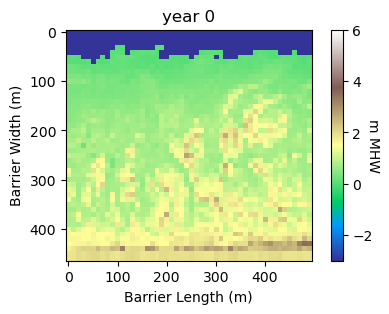

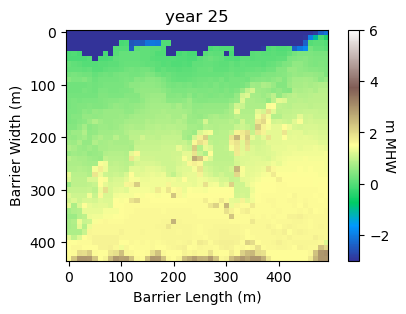

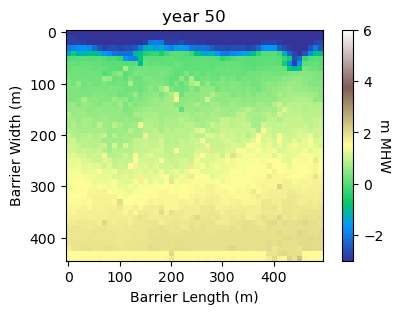

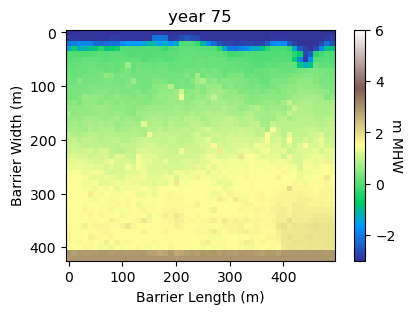

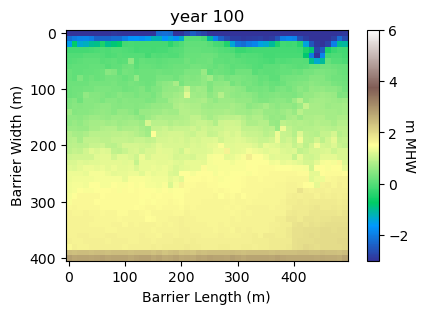

In [33]:
# plotting results from the sand fence run

plot_years = [0, 25, 50, 75, 100]
vmin = -3
vmax = 6

for year in plot_years:
    dune_domain_natural_sand = np.transpose(cascade_natural_sandfence.barrier3d[0]._DuneDomain[year]) + cascade_natural_sandfence.barrier3d[0].BermEl
    interior_domain_natural_sand = cascade_natural_sandfence.barrier3d[0]._DomainTS[year]
    full_domain_natural_sand = np.vstack([dune_domain_natural_sand, interior_domain_natural_sand])
    
    fig1 = plt.figure(figsize=(5,3))
    ax1 = fig1.add_subplot()
    mat = ax1.matshow(
        np.flip(full_domain_natural_sand) * 10,
        cmap="terrain",
        vmin=vmin,
        vmax=vmax,
    )
    ax1.set_title("year {0}".format(year))
    plt.gca().xaxis.tick_bottom()
    xtick_max = np.shape(full_domain_natural_sand)[1]  # n_cols = x
    x_ticks = np.array(range(0, xtick_max, 10))
    x_tick_labels = x_ticks * 10
    ytick_max = np.shape(full_domain_natural_sand)[0]  # n_rows = y
    y_ticks = np.array(range(0, ytick_max, 10))
    y_tick_labels = y_ticks * 10
    plt.xticks(x_ticks, x_tick_labels)
    plt.yticks(y_ticks, y_tick_labels)
    plt.ylabel("Barrier Width (m)")
    plt.xlabel("Barrier Length (m)")
    cbar = fig1.colorbar(mat)
    cbar.set_label('m MHW', rotation=270, labelpad=5)

## Comparing the scenarios - plots

<b>Growth Parameter

Text(0.5, 0, 'alongshore barrier length')

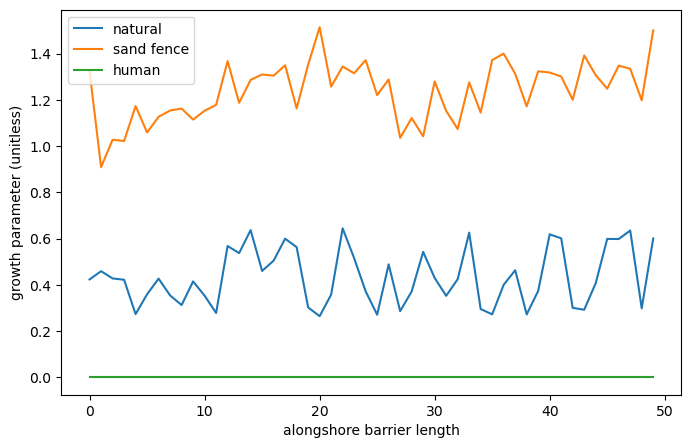

In [40]:
plt.rcParams.update({"font.size": 10})
plt.figure(figsize=(8,5))

plt.plot(cascade_natural.barrier3d[0].growthparam[0], label="natural")
plt.plot(cascade_natural_sandfence.barrier3d[0].growthparam[0], label="sand fence")
plt.legend(loc="upper left")
plt.ylabel("growth parameter (unitless)")
plt.xlabel("alongshore barrier length")

<b>Dune Crests

([<matplotlib.axis.XTick at 0x7fd8522a1850>,
 [Text(0, 0, '0'),
  Text(10, 0, '100'),
  Text(20, 0, '200'),
  Text(30, 0, '300'),
  Text(40, 0, '400')])

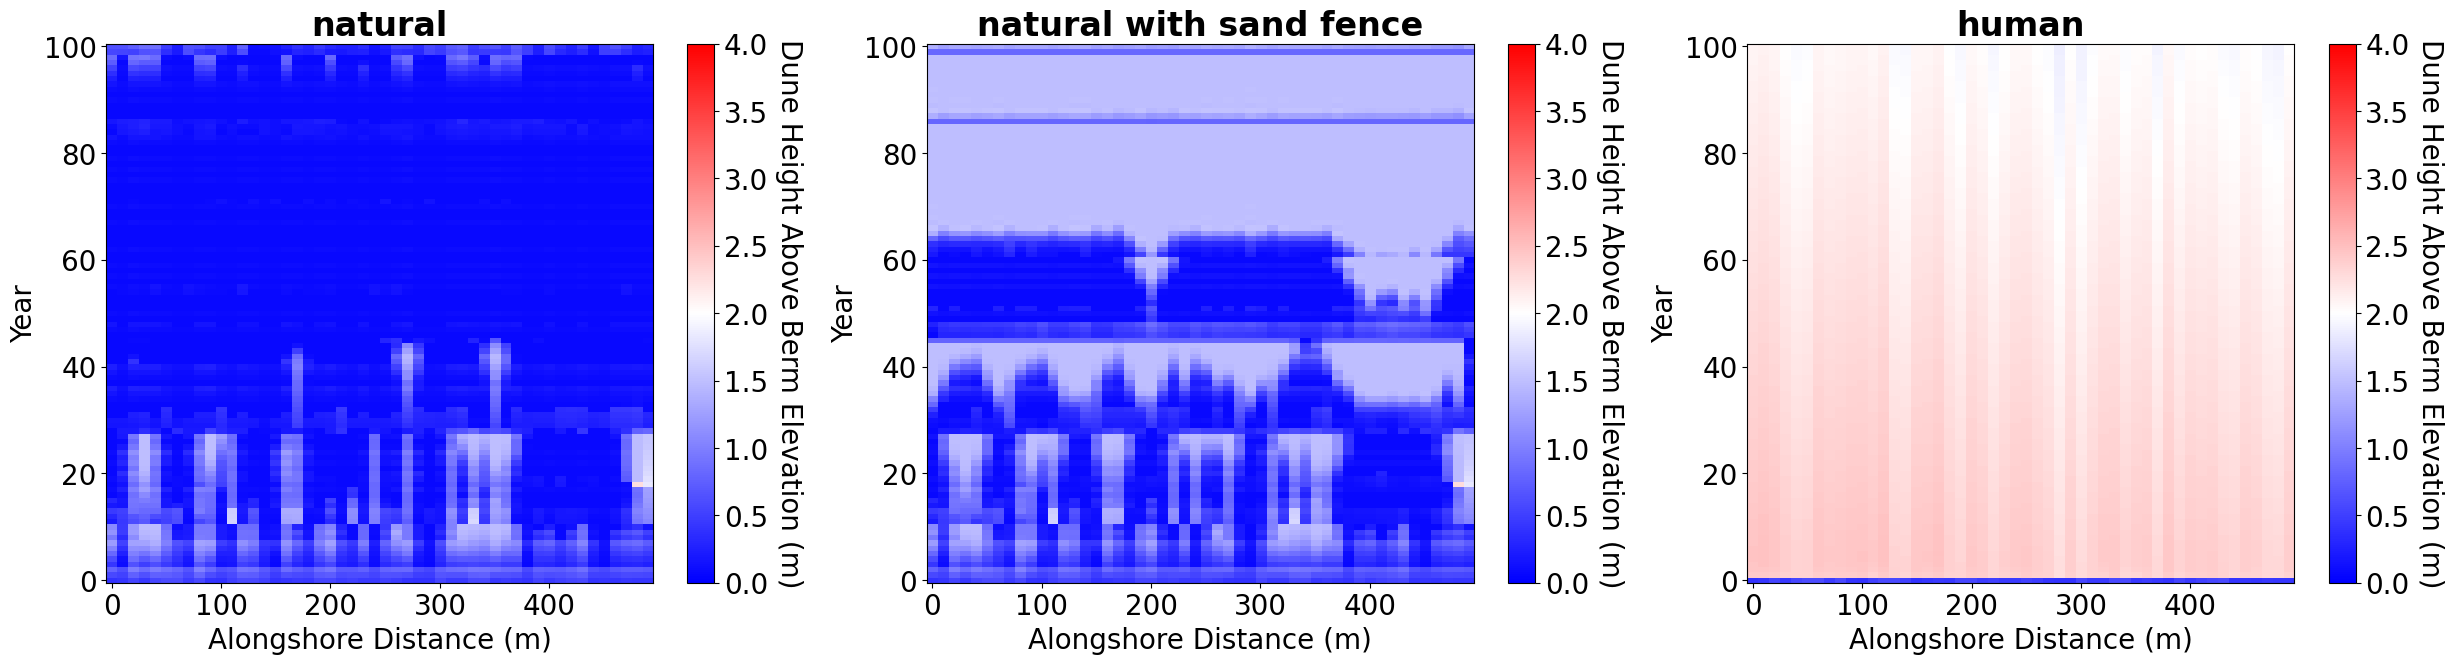

In [16]:
TMAX=101
vmin=0
vmax=4
duneFig = plt.figure(figsize=(15, 5))
plt.rcParams.update({"font.size": 12})


# natural scenario
DuneCrest = []
sub_domain = cascade_natural.barrier3d[0]._DuneDomain[0:TMAX, :, :]
DuneCrest.append(sub_domain.max(axis=2))

DuneCrest = np.hstack(DuneCrest).astype(float)

ax = duneFig.add_subplot(121)
cax = ax.matshow(
    np.flip(DuneCrest,1) * 10,
    origin="lower",
    cmap="bwr",
    aspect="auto",
    vmin=vmin,
    vmax=vmax,
)
ax.xaxis.set_ticks_position("bottom")
cbar = duneFig.colorbar(cax)
cbar.set_label('Dune Height Above Berm Elevation (m)', rotation=270, labelpad=25)
plt.xlabel("Alongshore Distance (m)")
plt.ylabel("Year")
plt.title("natural", weight="bold")

xtick_max = np.shape(DuneCrest)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
plt.xticks(x_ticks, x_tick_labels)


# sand fence
DuneCrest_sandfence = []
sub_domain_sandfence = cascade_natural_sandfence.barrier3d[0]._DuneDomain[0:TMAX, :, :]
DuneCrest_sandfence.append(sub_domain_sandfence.max(axis=2))

DuneCrest_sandfence = np.hstack(DuneCrest_sandfence).astype(float)

ax = duneFig.add_subplot(122)
cax = ax.matshow(
    np.flip(DuneCrest_sandfence,1) * 10,
    origin="lower",
    cmap="bwr",
    aspect="auto",
    vmin=vmin,
    vmax=vmax,
)
ax.xaxis.set_ticks_position("bottom")
cbar = duneFig.colorbar(cax)
cbar.set_label('Dune Height Above Berm Elevation (m)', rotation=270, labelpad=25)
plt.xlabel("Alongshore Distance (m)")
plt.ylabel("Year")
plt.title("natural with sand fence", weight="bold")
plt.xticks(x_ticks, x_tick_labels)

<b> Overwash

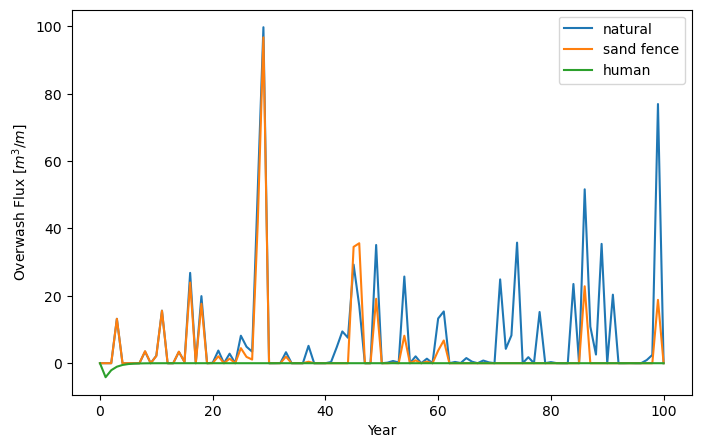

In [32]:
# plotting the overwash flux 
plt.figure(figsize=(8,5))
plt.rcParams.update({"font.size": 10})
OWTS_natural_sand = cascade_natural_sandfence.barrier3d[0].QowTS #m3/m
plt.plot(OWTS, label="natural")
plt.plot(OWTS_natural_sand, label="sand fence")
plt.xlabel("Year")
plt.ylabel("Overwash Flux [$m^3/m$]")
plt.legend()

<b> Shoreline Position

In [ ]:
# plotting the shoreline position 

plt.figsize=(5,3)
sandfence_xsTS = np.subtract(cascade_natural_sandfence.barrier3d[0].x_s_TS, cascade_natural_sandfence.barrier3d[0].x_s_TS[0])  
sandfence_xsTS_meters = np.multiply(sandfence_xsTS, 10)
plt.plot(natural_xsTS_meters)
plt.plot(sandfence_xsTS_meters)
plt.xlabel("Year")
plt.ylabel("Shoreline Position (m)")

<b> Elevations

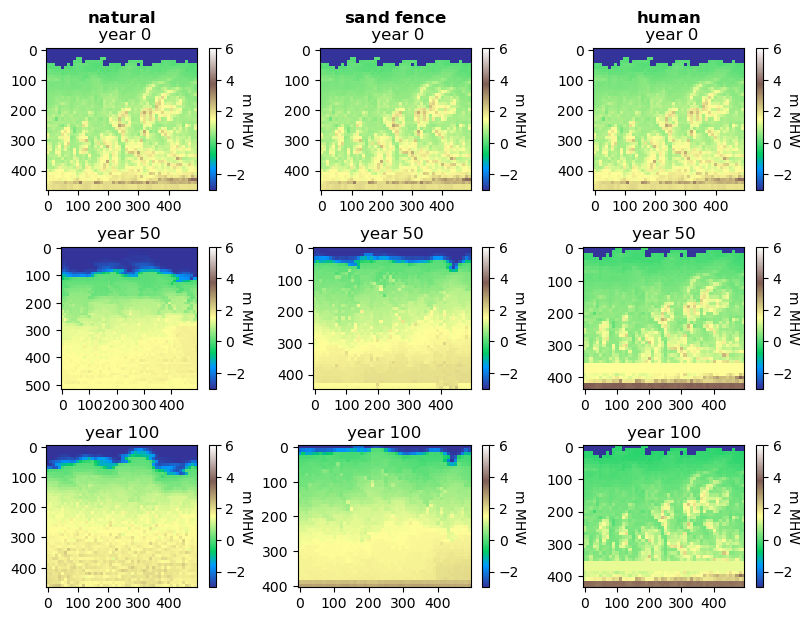

In [22]:
vmin = -3
vmax = 6
elev_fig = plt.figure(figsize=(10, 7))
plt.rcParams.update({"font.size": 10})

# natural dynamics -----------------------------------------------------------------------------------------------
# year 0
dune_domain = np.transpose(cascade_natural.barrier3d[0]._DuneDomain[0]) + cascade_natural.barrier3d[0].BermEl
interior_domain = cascade_natural.barrier3d[0]._DomainTS[0]
full_domain = np.vstack([dune_domain, interior_domain])

ax1 = elev_fig.add_subplot(321)
mat = ax1.matshow(
    np.flip(full_domain) * 10,
    cmap="terrain",
    vmin=vmin,
    vmax=vmax,
)
plt.title(r"$\bf{natural}$" + "\n year 0")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(full_domain)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(full_domain)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)
# plt.ylabel("Barrier Width (m)")
# plt.xlabel("Barrier Length (m)")
cbar = elev_fig.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=5)


# year 50
dune_domain = np.transpose(cascade_natural.barrier3d[0]._DuneDomain[50]) + cascade_natural.barrier3d[0].BermEl
interior_domain = cascade_natural.barrier3d[0]._DomainTS[50]
full_domain = np.vstack([dune_domain, interior_domain])

ax1 = elev_fig.add_subplot(323)
mat = ax1.matshow(
    np.flip(full_domain) * 10,
    cmap="terrain",
    vmin=vmin,
    vmax=vmax,
)
plt.title("year 50")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(full_domain)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(full_domain)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)
# plt.ylabel("Barrier Width (m)")
# plt.xlabel("Barrier Length (m)")
cbar = elev_fig.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=5)

# year 100
dune_domain = np.transpose(cascade_natural.barrier3d[0]._DuneDomain[100]) + cascade_natural.barrier3d[0].BermEl
interior_domain = cascade_natural.barrier3d[0]._DomainTS[100]
full_domain = np.vstack([dune_domain, interior_domain])

ax1 = elev_fig.add_subplot(325)
mat = ax1.matshow(
    np.flip(full_domain) * 10,
    cmap="terrain",
    vmin=vmin,
    vmax=vmax,
)
plt.title("year 100")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(full_domain)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(full_domain)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)
# plt.ylabel("Barrier Width (m)")
# plt.xlabel("Barrier Length (m)")
cbar = elev_fig.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=5)


# sand fence ------------------------------------------------------------------------------------------------------
# year 0
dune_domain = np.transpose(cascade_natural_sandfence.barrier3d[0]._DuneDomain[0]) + cascade_natural_sandfence.barrier3d[0].BermEl
interior_domain = cascade_natural_sandfence.barrier3d[0]._DomainTS[0]
full_domain = np.vstack([dune_domain, interior_domain])

ax1 = elev_fig.add_subplot(322)
mat = ax1.matshow(
    np.flip(full_domain) * 10,
    cmap="terrain",
    vmin=vmin,
    vmax=vmax,
)
plt.title(r"$\bf{sand \ fence}$" + "\n year 0")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(full_domain)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(full_domain)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)
# plt.ylabel("Barrier Width (m)")
# plt.xlabel("Barrier Length (m)")
cbar = elev_fig.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=5)


# year 50
dune_domain = np.transpose(cascade_natural_sandfence.barrier3d[0]._DuneDomain[50]) + cascade_natural_sandfence.barrier3d[0].BermEl
interior_domain = cascade_natural_sandfence.barrier3d[0]._DomainTS[50]
full_domain = np.vstack([dune_domain, interior_domain])

ax1 = elev_fig.add_subplot(324)
mat = ax1.matshow(
    np.flip(full_domain) * 10,
    cmap="terrain",
    vmin=vmin,
    vmax=vmax,
)
plt.title("year 50")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(full_domain)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(full_domain)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)
# plt.ylabel("Barrier Width (m)")
# plt.xlabel("Barrier Length (m)")
cbar = elev_fig.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=5)


# year 100
dune_domain = np.transpose(cascade_natural_sandfence.barrier3d[0]._DuneDomain[100]) + cascade_natural_sandfence.barrier3d[0].BermEl
interior_domain = cascade_natural_sandfence.barrier3d[0]._DomainTS[100]
full_domain = np.vstack([dune_domain, interior_domain])

ax1 = elev_fig.add_subplot(326)
mat = ax1.matshow(
    np.flip(full_domain) * 10,
    cmap="terrain",
    vmin=vmin,
    vmax=vmax,
)
plt.title("year 100")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(full_domain)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(full_domain)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)
# plt.ylabel("Barrier Width (m)")
# plt.xlabel("Barrier Length (m)")
cbar = elev_fig.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=5)


plt.subplots_adjust(hspace=0.4)

### Running CASCADE: human dynamics

Some of the human dynamics including rebuilding the dunes to specific heights and conducting beach nourishments to keep the beach at a specific width. See below how these management strategies alter the evolution of the barrier. 

In [ ]:
# In order to run CASCADE with human dynamics, we can set roadway_management and/or beach_nourishment on

datadir = "data/"
name = "human_dynamics"
iB3D = 0
total_time = 101

cascade_human = Cascade(
    datadir,
    name=name,
    elevation_file="barrier3d-default-elevation.npy",
    dune_file="barrier3d-default-dunes.npy",
    parameter_file="barrier3d-default-parameters.yaml",
    storm_file="cascade-default-storms.npy", 
    num_cores=1,  
    roadway_management_module=True,
    alongshore_transport_module=False,
    beach_nourishment_module=True,
    community_economics_module=False,
    alongshore_section_count=1,
    time_step_count=total_time,
    wave_height=1, # ---------- for BRIE and Barrier3D --------------- #
    wave_period=7,
    wave_asymmetry=0.8,
    wave_angle_high_fraction=0.2,
    bay_depth=3.0,
    s_background=0.001,
    berm_elevation=1.9,
    MHW=0.46,
    beta=0.04,
    sea_level_rise_rate=0.004,
    sea_level_rise_constant=True,
    background_erosion=0.0,
    min_dune_growth_rate=0.25,
    max_dune_growth_rate=0.65,
    road_ele=1.7,  # ---------- roadway management --------------- #
    road_width=30,
    road_setback=30,
    dune_design_elevation=3.7,
    dune_minimum_elevation=2.2,
    trigger_dune_knockdown=False,
    group_roadway_abandonment=None,
    nourishment_interval=None, # ---------- beach and dune ("community") management --------------- #
    nourishment_volume=300.0,
    overwash_filter=40,
    overwash_to_dune=10,
)

In [ ]:
for time_step in range(cascade_human._nt - 1):
    print("\r", "Time Step: ", time_step + 1, end="")
    cascade_human.update()
    if cascade_human.b3d_break:
        break

 Time Step:  100

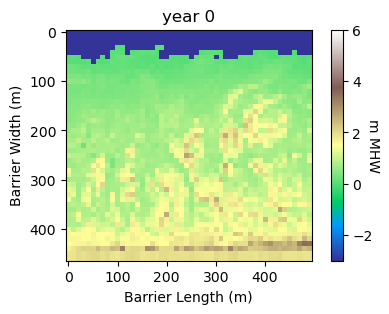

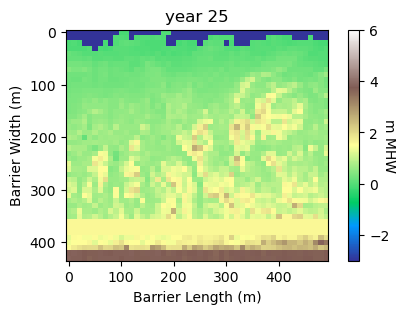

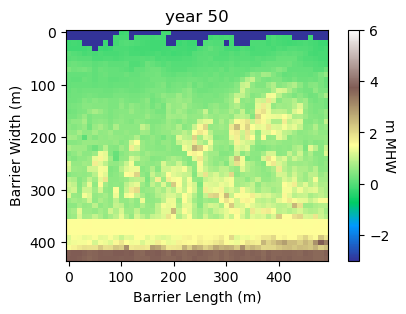

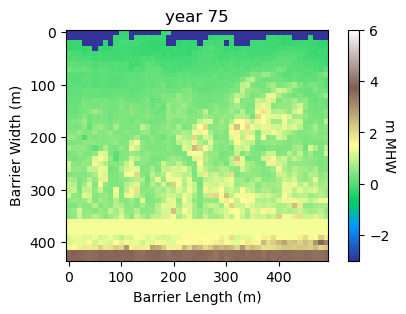

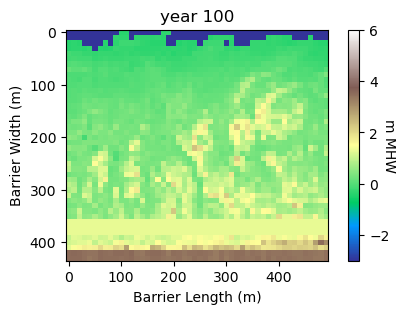

In [ ]:
# plotting results from the human dynamics run

plot_years = [0, 25, 50, 75, 100]
vmin = -3
vmax = 6

for year in plot_years:
    dune_domain_human = np.transpose(cascade_human.barrier3d[0]._DuneDomain[year]) + cascade_human.barrier3d[0].BermEl
    interior_domain_human = cascade_human.barrier3d[0]._DomainTS[year]
    full_domain_human = np.vstack([dune_domain_human, interior_domain_human])
    
    fig1 = plt.figure(figsize=(5,3))
    ax1 = fig1.add_subplot()
    mat = ax1.matshow(
        np.flip(full_domain_human) * 10,
        cmap="terrain",
        vmin=vmin,
        vmax=vmax,
    )
    ax1.set_title("year {0}".format(year))
    plt.gca().xaxis.tick_bottom()
    xtick_max = np.shape(full_domain_human)[1]  # n_cols = x
    x_ticks = np.array(range(0, xtick_max, 10))
    x_tick_labels = x_ticks * 10
    ytick_max = np.shape(full_domain_human)[0]  # n_rows = y
    y_ticks = np.array(range(0, ytick_max, 10))
    y_tick_labels = y_ticks * 10
    plt.xticks(x_ticks, x_tick_labels)
    plt.yticks(y_ticks, y_tick_labels)
    plt.ylabel("Barrier Width (m)")
    plt.xlabel("Barrier Length (m)")
    cbar = fig1.colorbar(mat)
    cbar.set_label('m MHW', rotation=270, labelpad=5)

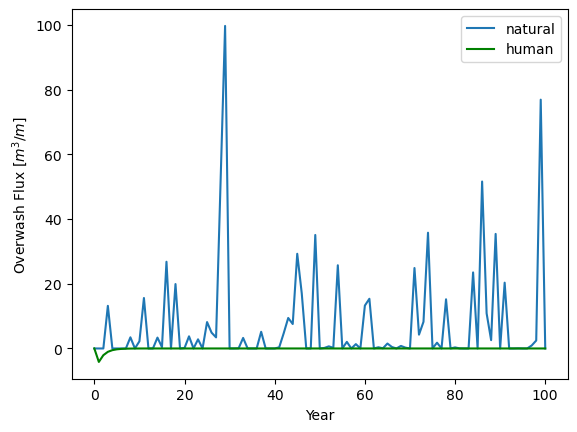

In [ ]:
# plotting the overwash flux 
OWTS_human = cascade_human.barrier3d[0].QowTS #m3/m
plt.plot(OWTS, label="natural")
plt.plot(OWTS_human, label="human", color="green")
plt.xlabel("Year")
plt.ylabel("Overwash Flux [$m^3/m$]")
plt.legend()

<div class="alert alert-block alert-info"> We can see that with human management of the barrier, the dunes remain higher, but the barrier narrows. Additionally there is little change to the barrier interior. This is due to the taller dunes limiting overwash flux. 
    </div>